In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
xtrain=pd.read_table('/home/hardik/Desktop/UCI HAR Dataset/train/X_train.txt',delim_whitespace=True,header=None)

In [3]:
xtest=pd.read_table('/home/hardik/Desktop/UCI HAR Dataset/test/X_test.txt',delim_whitespace=True,header=None)

In [4]:
ytrain=pd.read_table('/home/hardik/Desktop/UCI HAR Dataset/train/y_train.txt',header=None)

In [5]:
ytest=pd.read_table('/home/hardik/Desktop/UCI HAR Dataset/test/y_test.txt',header=None)

In [6]:
X = pd.concat([xtrain, xtest], axis = 0)
y = pd.concat([ytrain, ytest], axis = 0)

In [7]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [8]:
y2 = y
y2 = np.asarray(y2)
y2 = pd.DataFrame(y2)
y2[0][367]

5

In [9]:
for i in range(0, len(y2)):
    if(y2[0][i] == 1):
        y2[0][i] = 'Walking'
    elif(y2[0][i] == 2):
        y2[0][i] = 'Walking Upstairs'
    elif(y2[0][i] == 3):
        y2[0][i] = 'Walking Downstairs'
    elif(y2[0][i] == 4):
        y2[0][i] = 'Sitting'
    elif(y2[0][i] == 5):
        y2[0][i] = 'Standing'
    elif(y2[0][i] == 6):
        y2[0][i] = 'Laying'

In [10]:
X.shape

(10299, 561)

In [11]:
#PCA algorithm being used for the dimensionality reduction process
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [12]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
X_trans = pca.transform(X)

In [14]:
X_trans = pd.DataFrame(X_trans, columns = ['F1', 'F2'])

In [15]:
X_trans.head()

,F1,F2
0,-5.537858,-0.716346
1,-5.564174,-0.579506
2,-5.499319,-0.297684
3,-5.700396,0.354586
4,-5.769082,0.559389


In [16]:
X_trans['label'] = y2[0]

In [17]:
X_trans.tail()

,F1,F2,label
10294,4.427804,-1.436294,Walking Upstairs
10295,5.003146,-0.947679,Walking Upstairs
10296,4.536584,-0.994006,Walking Upstairs
10297,3.744576,-1.276951,Walking Upstairs
10298,3.969318,-1.048846,Walking Upstairs


In [18]:
import matplotlib

In [19]:
sns.lmplot(x = 'F1', y = 'F2', data = X_trans, hue = 'label',  fit_reg = False, x_jitter = 4.25, y_jitter = 2.4, size = 15)

In [20]:
plt.xlabel('F1 Feature')
plt.ylabel('F2 Feature')

In [21]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})

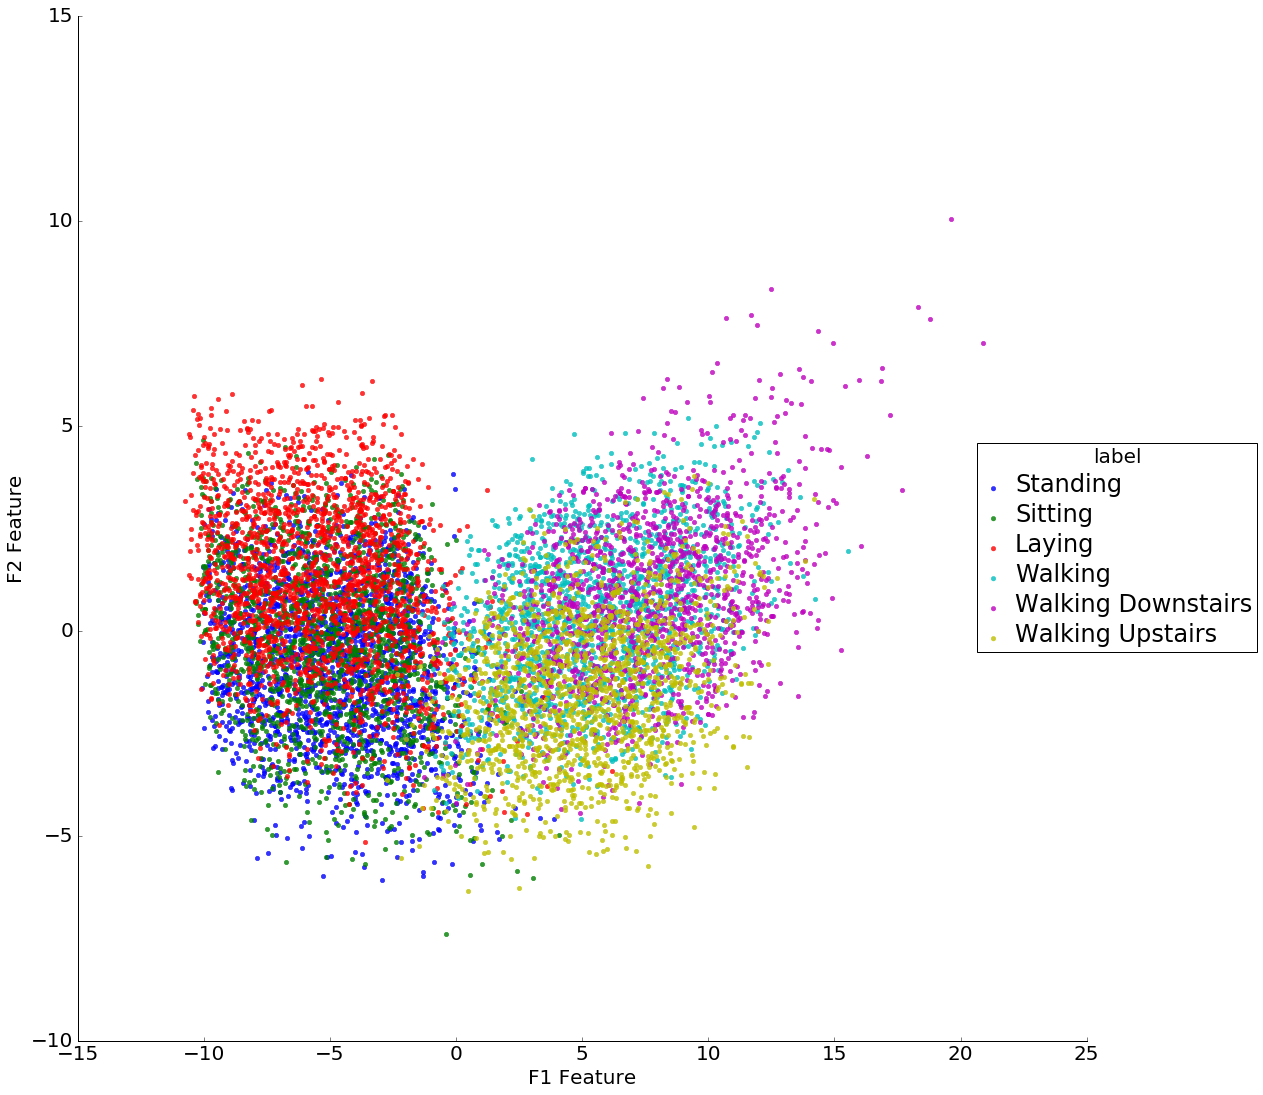

In [22]:
plt.show()

In [23]:
plt.figure(figsize = (18, 10))
sns.countplot(x = 'label', data = X_trans)
plt.tight_layout()

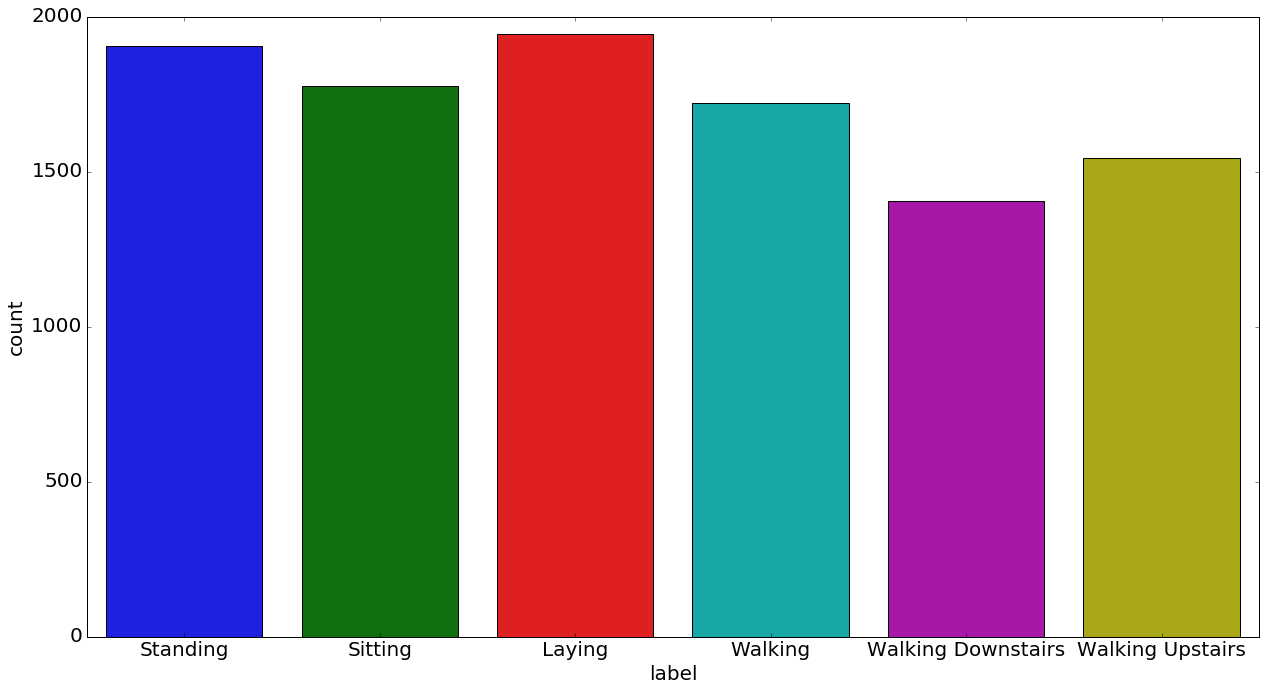

In [24]:
plt.show()

In [25]:
#hexagonal joint mapping plot for the data
plt.figure(figsize = (15, 10))
sns.jointplot(x= 'F1', y = 'F2', data = X_trans, kind = 'hex', color = 'red', size = 15 )
plt.tight_layout()

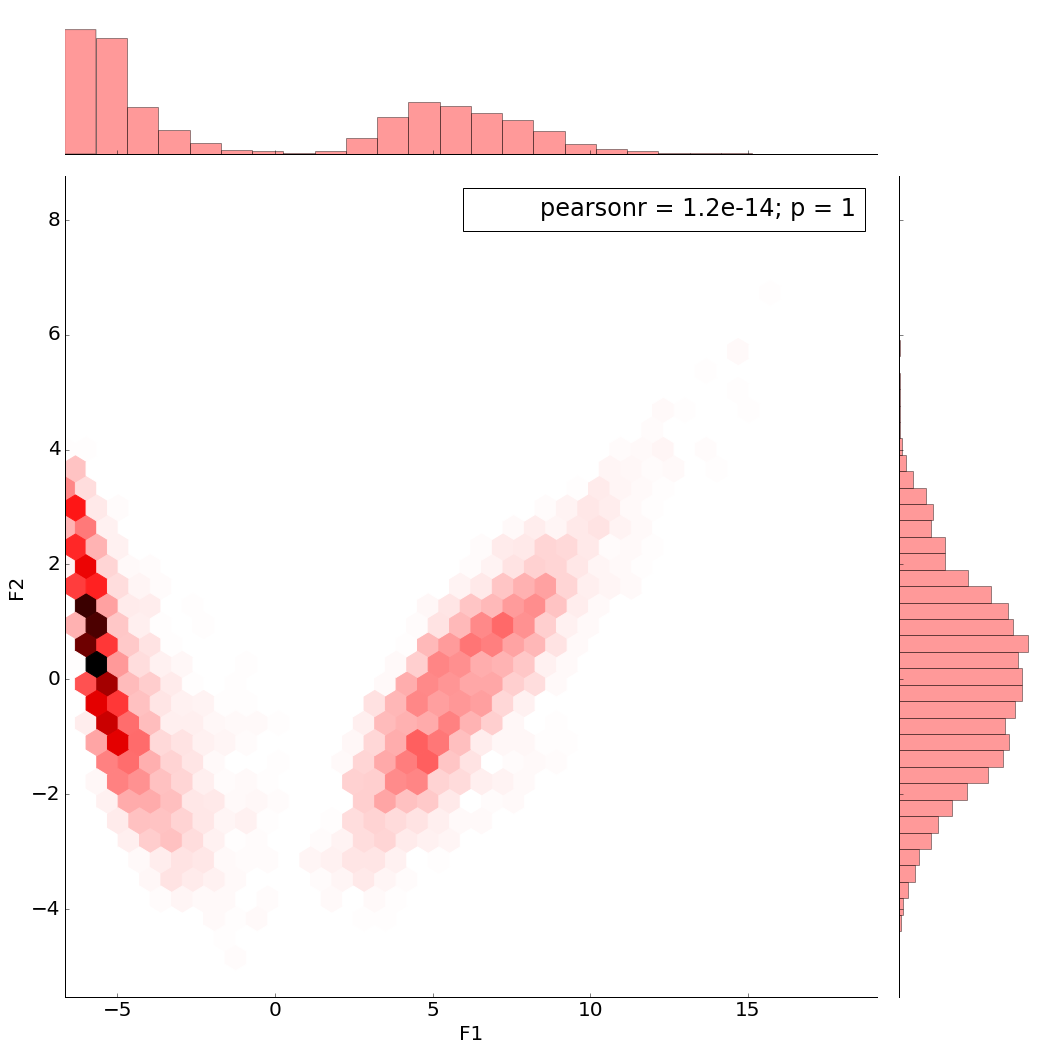

In [26]:
plt.show()

In [27]:
plt.figure(figsize = (10, 10))
sns.pairplot(X_trans, hue = 'label', size = 10)

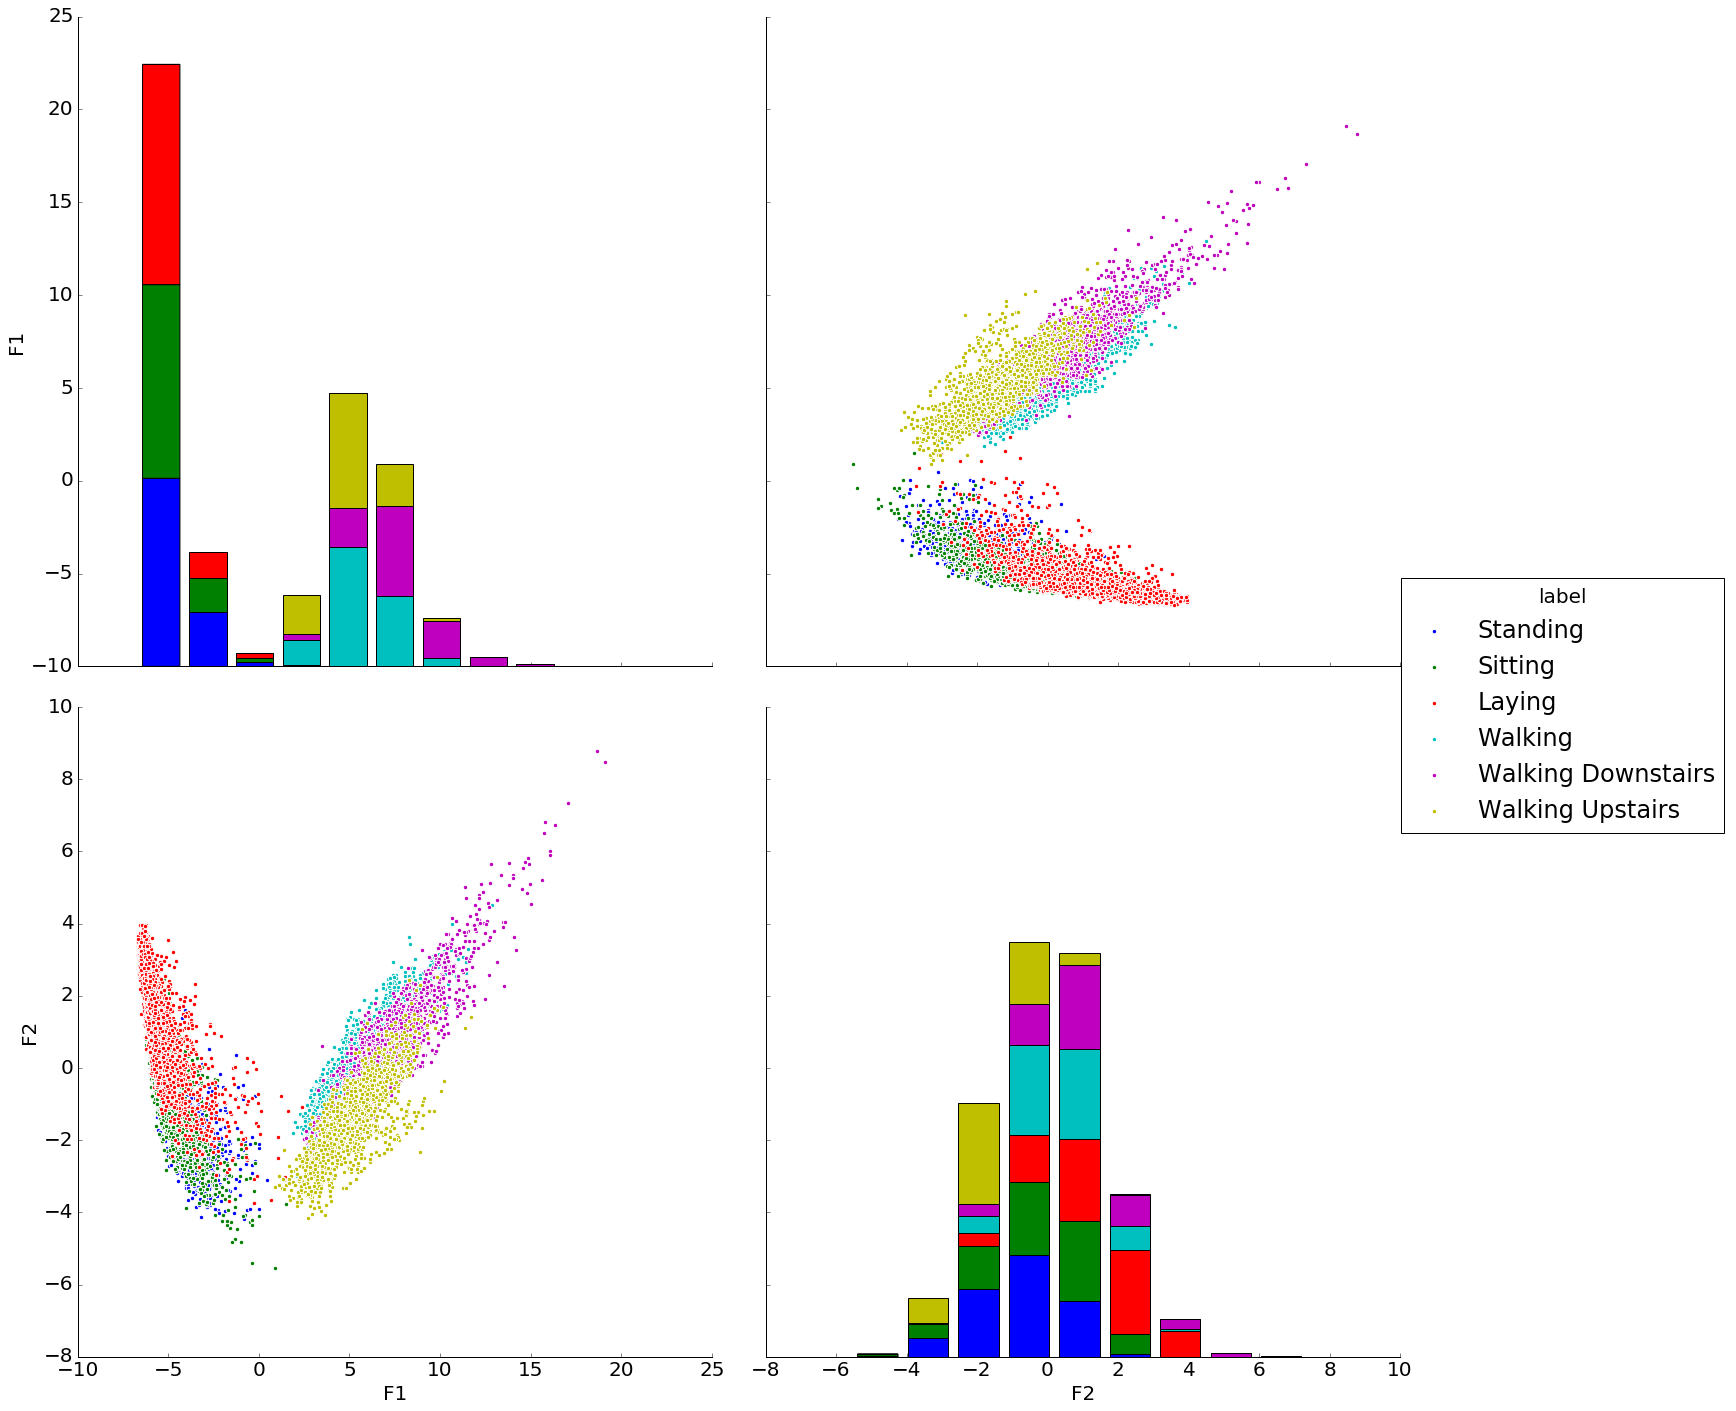

In [28]:
plt.show()

In [29]:
#F1 distribution plot
plt.figure(figsize = (10,10))
sns.kdeplot(X_trans['F1'], gridsize = 500)

In [30]:
plt.xlabel('Range of F1')
plt.ylabel('Distribution of F1')

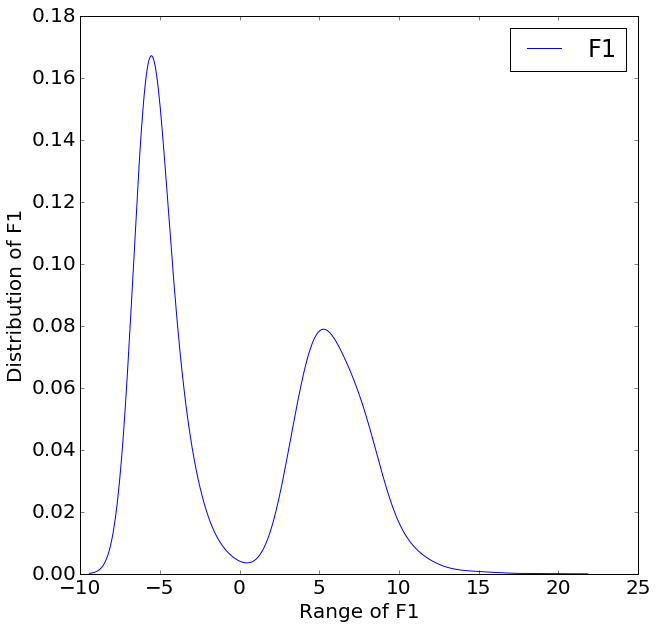

In [31]:
plt.show()

In [32]:
#F2 distribution plot
plt.figure(figsize = (10, 10))
sns.kdeplot(X_trans['F2'])

In [33]:
plt.xlabel('Range of F2')
plt.ylabel('Distribution of F2')

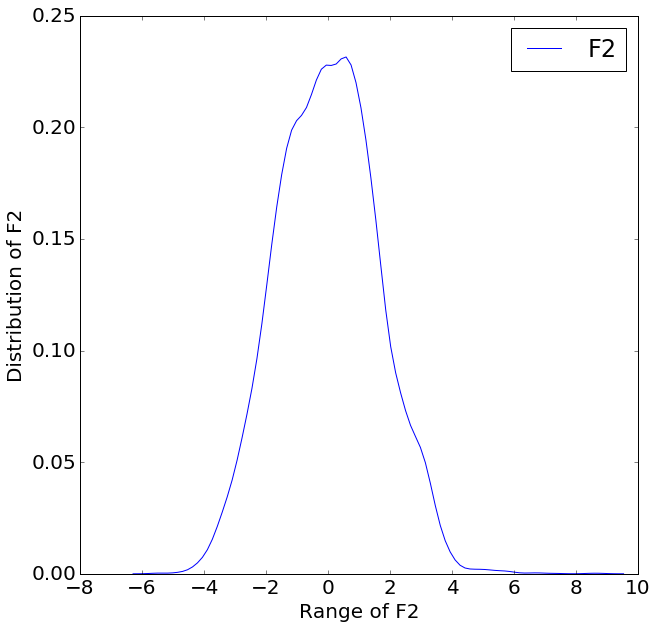

In [34]:
plt.show()

In [35]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

In [36]:
#Drawing another FacetGrid plot
plt.figure(figsize = (15, 10))
g = sns.FacetGrid(data = X_trans, row = 'label')
g.map(plt.scatter, 'F1', 'F2')

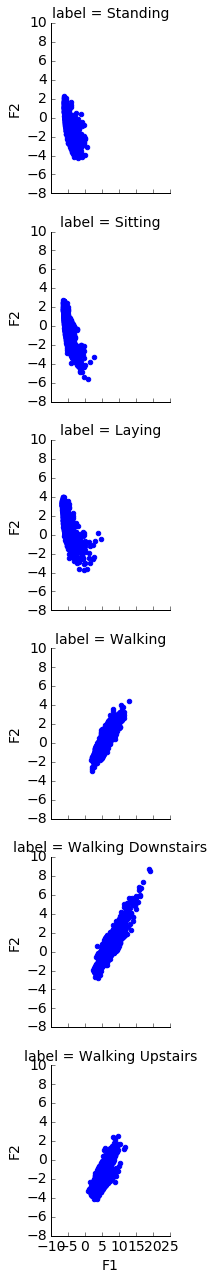

In [37]:
plt.show()

In [38]:
import matplotlib
matplotlib.rcParams.update({'font.size': 17})

In [55]:
#F1 violin plot
plt.figure(figsize = (15, 10))
sns.violinplot(x = 'label', y= 'F1', data = X_trans, rot=60)
plt.tight_layout()

In [56]:
plt.xlabel('Class Label')
plt.ylabel('F1 Feature')

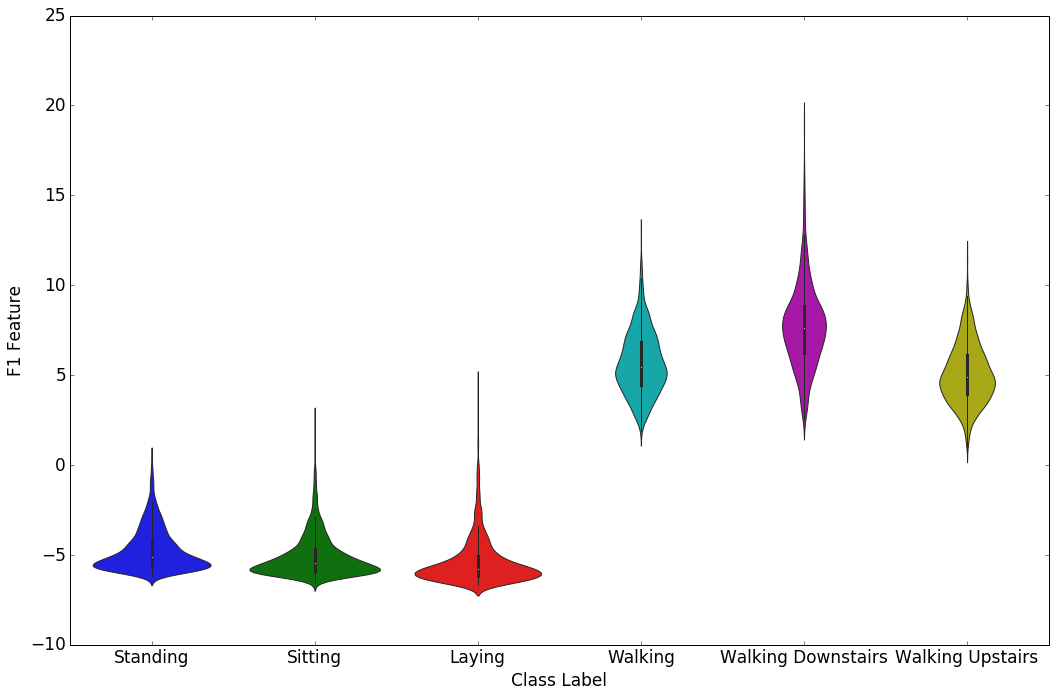

In [57]:
plt.show()

In [42]:
#F2 violin plot
plt.figure(figsize = (15, 10))
sns.violinplot(x = 'label', y= 'F2', data = X_trans)
plt.tight_layout()

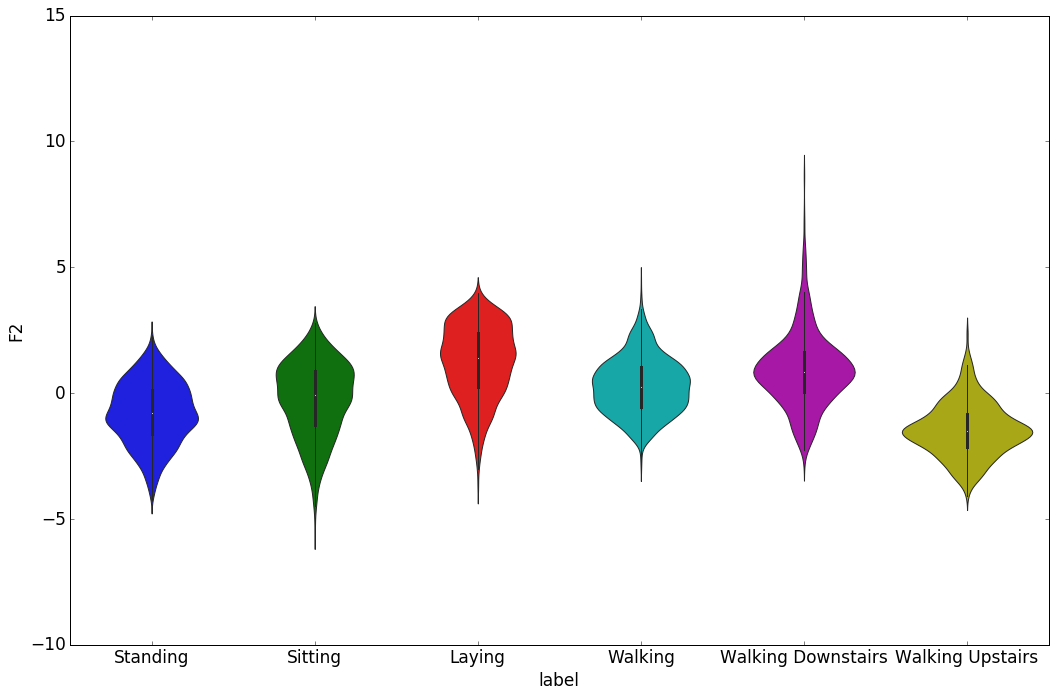

In [43]:
plt.show()

In [44]:
#F1 strip plot
plt.figure(figsize = (15, 8))
sns.stripplot(x = 'label', y= 'F1', data = X_trans, jitter = True, dodge = True)
plt.tight_layout()

In [45]:
plt.xlabel('Class Label')
plt.ylabel('F1 Feature')

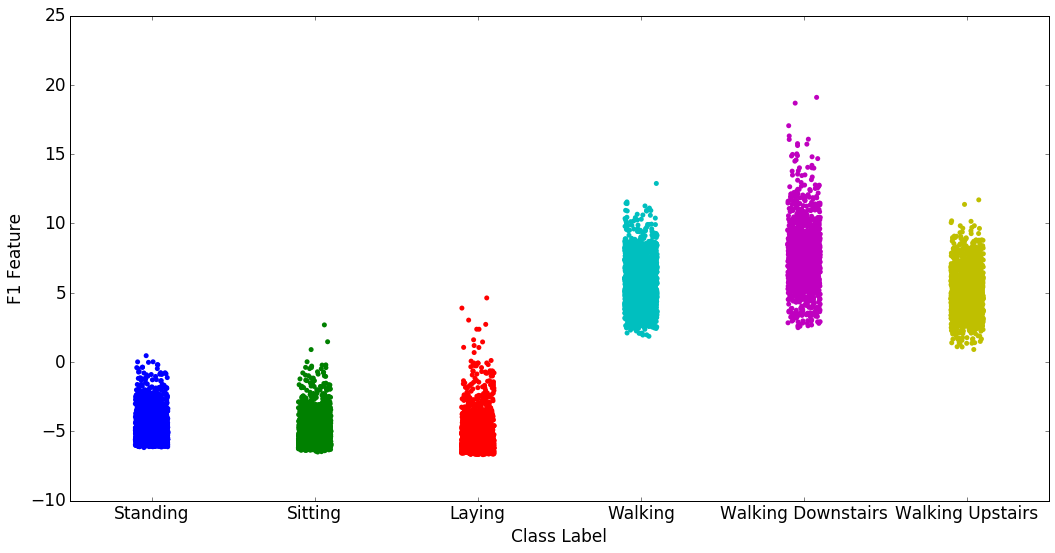

In [46]:
plt.show()

In [47]:
#F2 strip plot
plt.figure(figsize = (15, 8))
sns.stripplot(x = 'label', y= 'F2', data = X_trans, jitter = True, dodge = True)
plt.tight_layout()

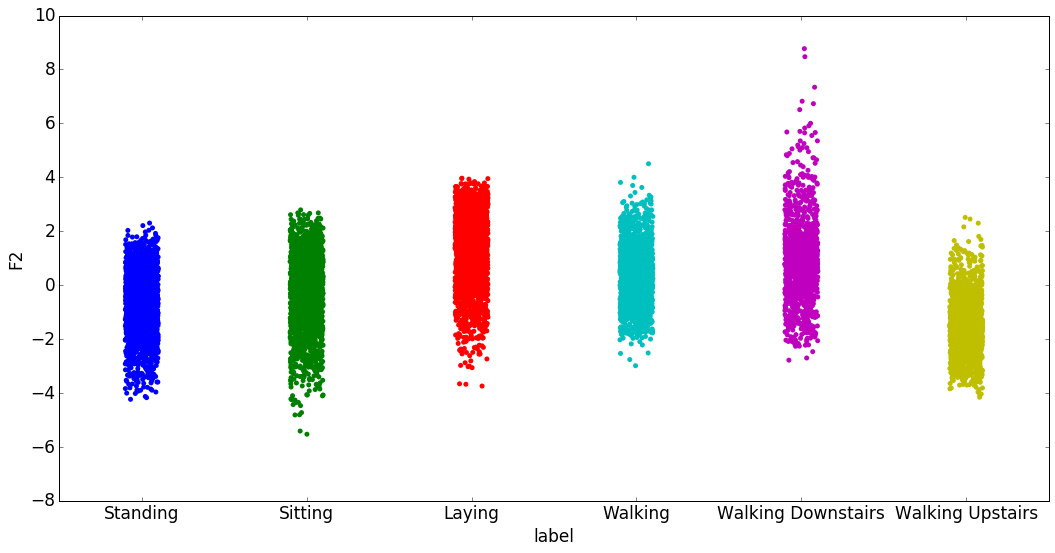

In [48]:
plt.show()